In [7]:
from keras.layers import Input, Dense
from keras.models import Model

from keras.datasets import mnist
import numpy as np

import matplotlib.pyplot as plt

# Data

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


# Model

In [3]:
# size of encoded representations
encoding_dim = 32

# this is our input placeholder
input_img = Input(shape=(784,))

# encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# map input to its encoded representation
encoder = Model(input_img, encoded)


# input to the decoder
encoded_input = Input(shape=(encoding_dim,))

# reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded_input)
decoded = Dense(784, activation='sigmoid')(decoded)

# decoder model
decoder = Model(encoded_input, decoded)

# map an input to its reconstruction
out = decoder(encoder(input_img))

autoencoder = Model(input_img,out)

In [5]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
model_1 (Model)              (None, 32)                25120     
_________________________________________________________________
model_2 (Model)              (None, 784)               641312    
Total params: 666,432
Trainable params: 666,432
Non-trainable params: 0
_________________________________________________________________


# Train

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 55us/step - loss: 0.3014 - val_loss: 0.2679
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2656 - val_loss: 0.2635
Epoch 3/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2623 - val_loss: 0.2602
Epoch 4/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2579 - val_loss: 0.2540
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2496 - val_loss: 0.2437
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2395 - val_loss: 0.2339
Epoch 7/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2301 - val_loss: 0.2245
Epoch 8/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2212 - val_loss: 0.2158
Epoch 9/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2131 - val_loss: 0.2081
Epoch

# Visualize

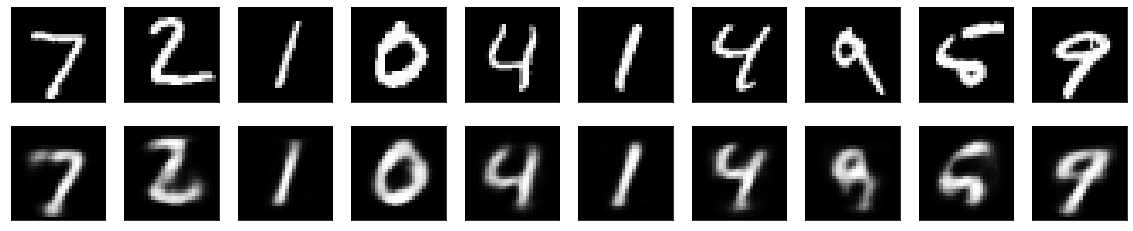

In [8]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()